In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for some monitors, this makes the figures crisp
%config InlineBackend.figure_format='retina'

In [16]:
rpkm = pd.read_csv('data/CCLE_rpkm_forcourse.csv.gz', index_col=0)
meta = pd.read_csv('data/CCLE_rpkm_metadata_forcourse.csv.gz', index_col=0)

In [24]:
data[:3]

,WASH7P,MTND1P23,MTND2P28,hsa-mir-6723,RP5-857K21.7,MTATP8P1,MTATP6P1,RP5-857K21.11,SAMD11,NOC2L,...,Growth.Medium,Supplements,Freezing.Medium,Doubling.Time.from.Vendor,Doubling.Time.Calculated.hrs,type,type_refined,PATHOLOGIST_ANNOTATION,mutRate,tcga_code
Cell_Line,,,,,,,,,,,,,,,,,,,,,
2313287_STOMACH,4.26104,0.839617,115.65700,24.8860,8.3378,13.06640,241.8750,6.39347,0.472467,47.5542,...,90%RPMI 1640+10% h.i FBS,NaN,10%DMSO,50 hrs,97.6,stomach,stomach,Gastric:Carcinoma,521.355253,STAD
42MGBA_CENTRAL_NERVOUS_SYSTEM,3.99494,1.376160,4.86524,9.4919,17.7806,5.61414,15.6446,9.96201,11.776600,106.4350,...,RPMI:EMEM (1:1) +20 % FBS,NaN,5%DMSO,NaN,82.6,glioma,glioma,CNS:Glioma_HighGrade,107.050880,GBM
59M_OVARY,2.56941,4.081810,70.18380,34.3897,26.3026,8.09055,575.6590,20.21690,3.678380,76.9264,...,NaN,NaN,NaN,NaN,NaN,ovary,ovary,Ovary:Carcinoma,110.612331,OV


In [25]:
meta[:3]

,depMapID,Name,Pathology,Site_Primary,Site_Subtype1,Site_Subtype2,Site_Subtype3,Histology,Hist_Subtype1,Hist_Subtype2,...,Growth.Medium,Supplements,Freezing.Medium,Doubling.Time.from.Vendor,Doubling.Time.Calculated.hrs,type,type_refined,PATHOLOGIST_ANNOTATION,mutRate,tcga_code
Cell_Line,,,,,,,,,,,,,,,,,,,,,
2313287_STOMACH,ACH-000948,23132/87,primary,stomach,NS,NS,NS,carcinoma,adenocarcinoma,NS,...,90%RPMI 1640+10% h.i FBS,NaN,10%DMSO,50 hrs,97.6,stomach,stomach,Gastric:Carcinoma,521.355253,STAD
42MGBA_CENTRAL_NERVOUS_SYSTEM,ACH-000323,42-MG-BA,primary,central_nervous_system,brain,NS,NS,glioma,astrocytoma_Grade_IV,glioblastoma_multiforme,...,RPMI:EMEM (1:1) +20 % FBS,NaN,5%DMSO,NaN,82.6,glioma,glioma,CNS:Glioma_HighGrade,107.050880,GBM
59M_OVARY,ACH-000520,59M,metastasis,ovary,NS,NS,NS,carcinoma,NS,NS,...,NaN,NaN,NaN,NaN,NaN,ovary,ovary,Ovary:Carcinoma,110.612331,OV


In [15]:
data = rpkm.merge(meta, left_index=True, right_index=True, how='left')

In [19]:
print(meta.columns)

Index(['depMapID', 'Name', 'Pathology', 'Site_Primary', 'Site_Subtype1',
       'Site_Subtype2', 'Site_Subtype3', 'Histology', 'Hist_Subtype1',
       'Hist_Subtype2', 'Hist_Subtype3', 'Gender', 'Life_Stage', 'Age', 'Race',
       'Geo_Loc', 'inferred_ethnicity', 'Site_Of_Finding', 'Disease',
       'Annotation_Source', 'Original.Source.of.Cell.Line', 'Characteristics',
       'Growth.Medium', 'Supplements', 'Freezing.Medium',
       'Doubling.Time.from.Vendor', 'Doubling.Time.Calculated.hrs', 'type',
       'type_refined', 'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code'],
      dtype='object')


In [23]:
pd.crosstab(meta['Site_Primary'],meta['Race'])

Race,african,african_american,american_indian,asian,caucasian,east_indian,north_african
Site_Primary,,,,,,,
breast,0,9,0,3,35,1,0
central_nervous_system,0,1,0,7,12,0,0
endometrium,0,0,0,15,6,0,0
haematopoietic_and_lymphoid_tissue,2,3,0,21,32,0,1
kidney,0,0,0,7,5,0,0
large_intestine,0,0,1,13,25,0,0
lung,0,10,0,12,99,0,0
ovary,0,1,0,13,8,0,0
pancreas,0,0,0,13,18,0,0


In [29]:
meta['Doubling.Time.Calculated.hrs'].nsmallest(20)

Cell_Line
SW620_LARGE_INTESTINE                      20.9
NCIH82_LUNG                                21.6
CAL33_UPPER_AERODIGESTIVE_TRACT            24.8
BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    25.5
NCIH460_LUNG                               25.5
RKO_LARGE_INTESTINE                        25.6
CA46_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    25.7
ES2_OVARY                                  25.8
CAL51_BREAST                               26.8
UO31_KIDNEY                                27.8
IPC298_SKIN                                29.0
CAL27_UPPER_AERODIGESTIVE_TRACT            29.3
LOXIMVI_SKIN                               29.3
HS618T_FIBROBLAST                          30.0
MCAS_OVARY                                 30.0
A375_SKIN                                  30.8
NCIH1792_LUNG                              31.2
769P_KIDNEY                                31.5
GAMG_CENTRAL_NERVOUS_SYSTEM                33.0
HCC44_LUNG                                 33.0
Name: Doubling.Time.Calculated

<Axes: xlabel='Doubling.Time.Calculated.hrs', ylabel='MYC'>

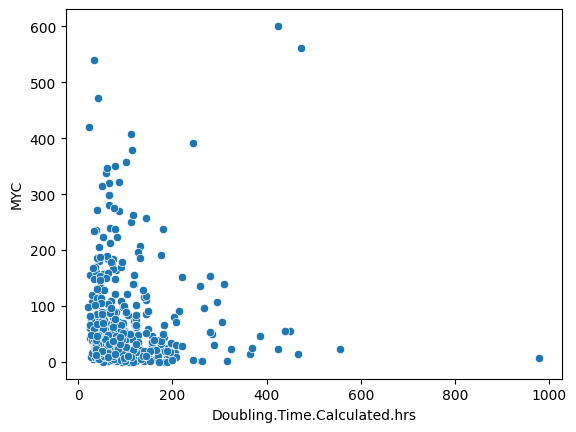

In [30]:
sns.scatterplot(data=data, x='Doubling.Time.Calculated.hrs', y='MYC')

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/606267119.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=data, x='MYC', y='Site_Primary', palette='husl')


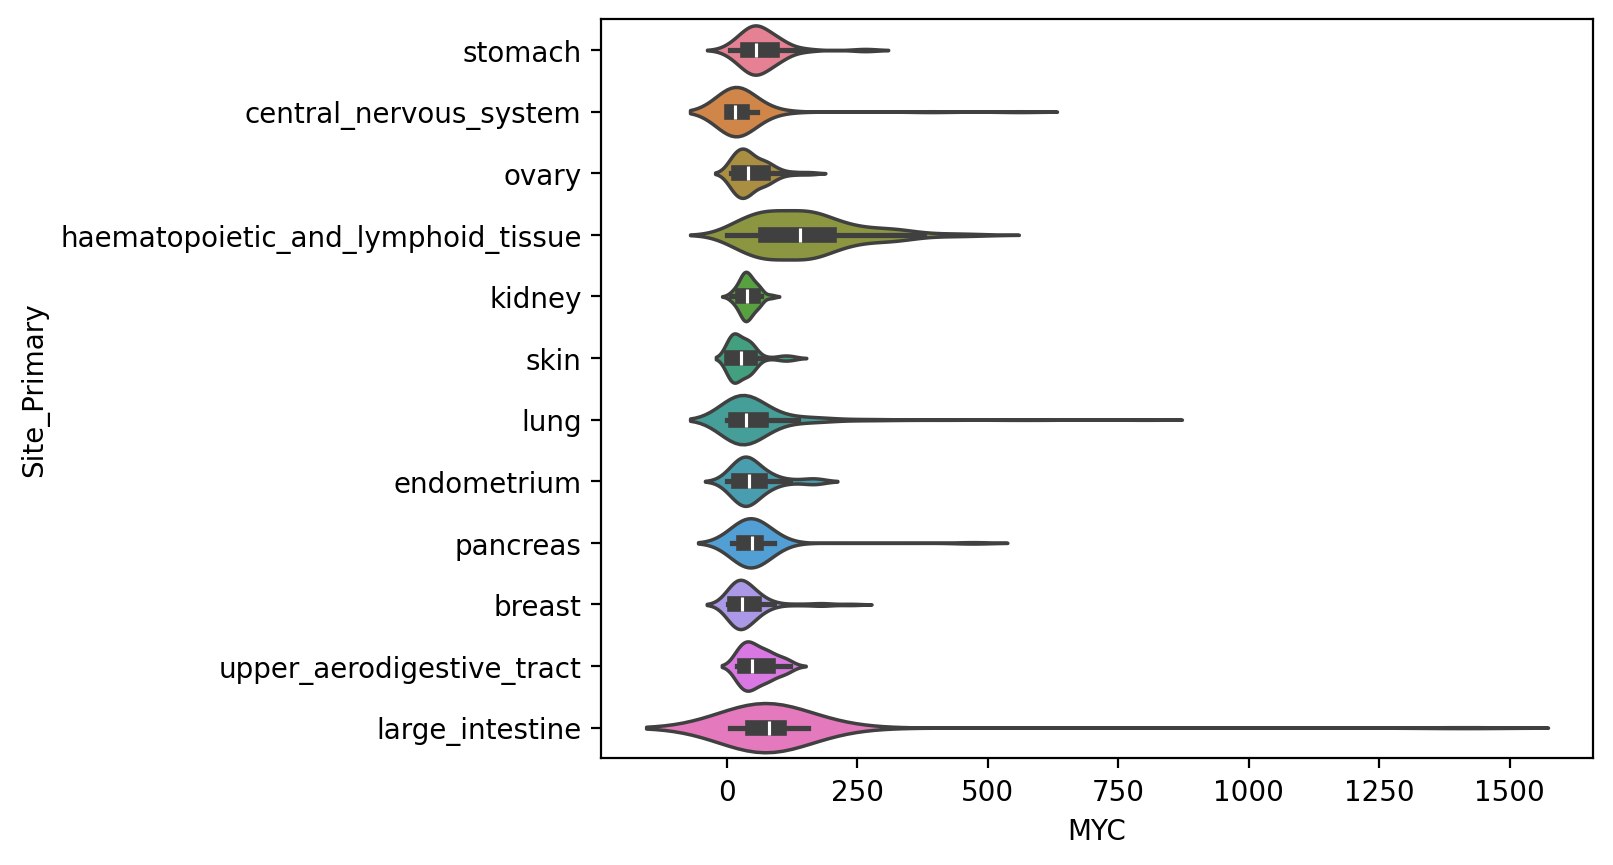

In [42]:
g = sns.violinplot(data=data, x='MYC', y='Site_Primary', palette='husl')

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/510771864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=data, x='Site_Primary', y='MYC', palette='husl')
/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/510771864.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


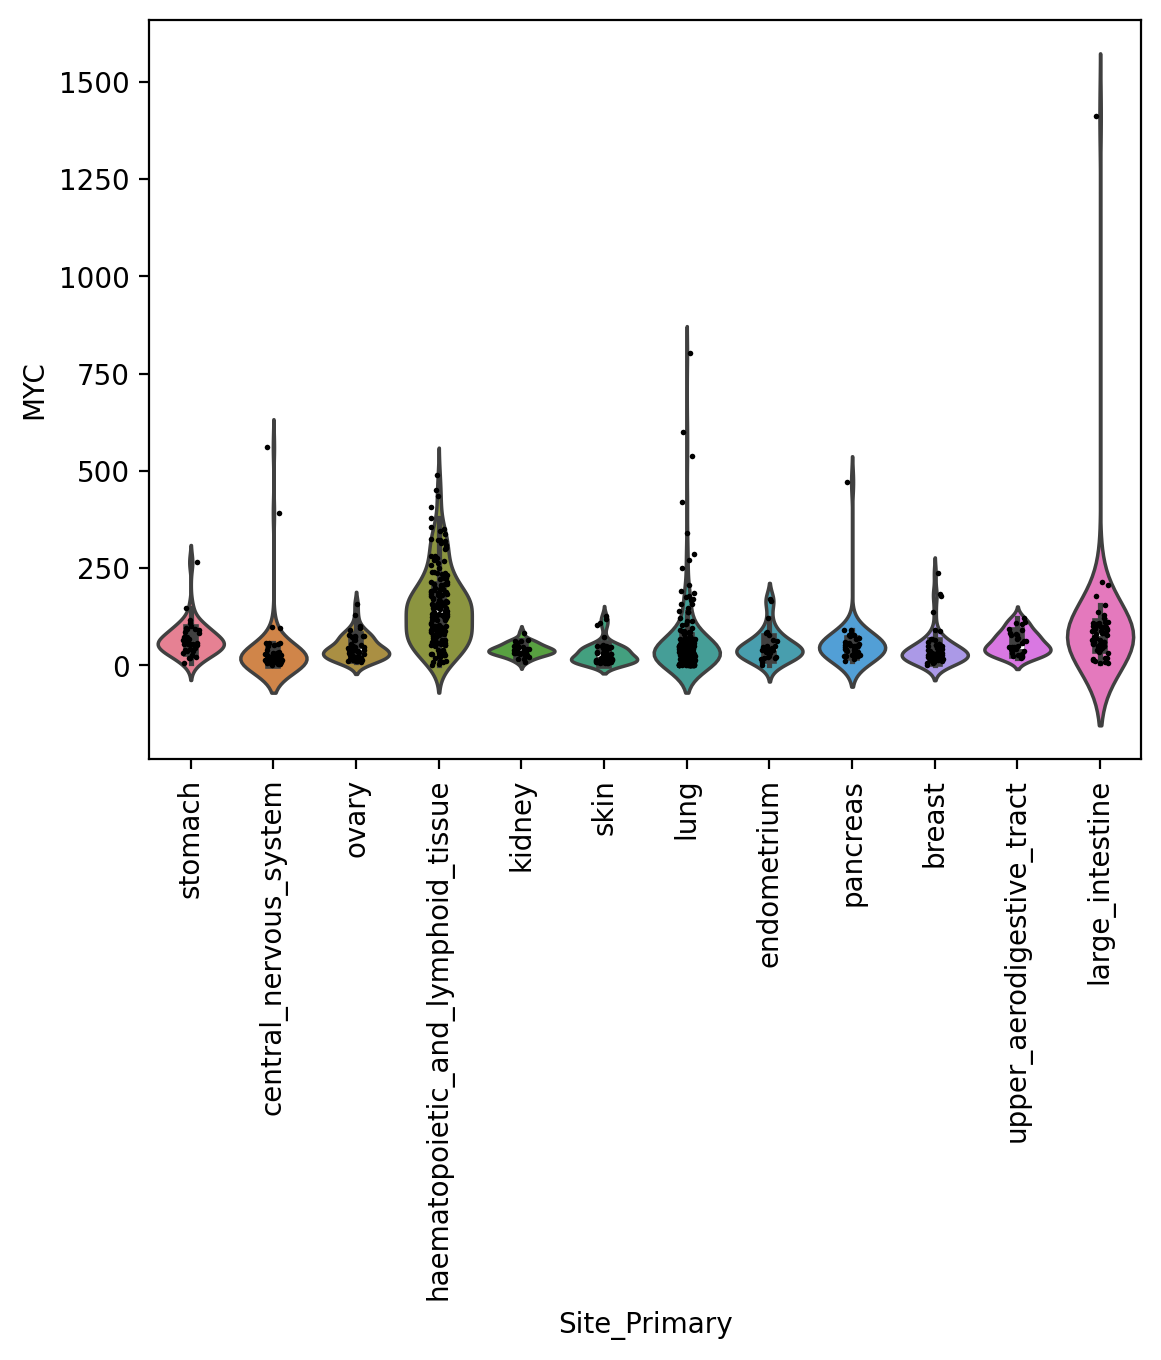

In [37]:
g = sns.violinplot(data=data, x='Site_Primary', y='MYC', palette='husl')
sns.stripplot(data=data, x='Site_Primary', y='MYC', color='black', s=2)
g.set_xticklabels(g.get_xticklabels(), rotation=90);